# 01a - COCO Dataset

## 1. COCO PythonAPI

First we will use the COCO PythonAPI `pycocotools` to load the COCO dataset and learn how to read its annotations. To install `pycocotools`, run:

```bash
!pip install pycocotools>=2.0.1
```

COCO PythonAPI's Tutorial: [pycocoDemo.ipynb](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb)

First we download COCO's annotation files and then put these `json` files into `COCOdataset2017/annotations/`.

In [1]:
from pycocotools.coco import COCO
from tqdm import tqdm_notebook
import urllib.request
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [5]:
# Initialize COCO api for instance annotations
# COCO take the .json annotation file as input
coco = COCO('/data/lx_pantos/annotation_231106/processed.json')

loading annotations into memory...
Done (t=0.67s)
creating index...
index created!


COCO dataset has 80 categories:

In [6]:
# Get all categories
cats = coco.loadCats(coco.getCatIds())

# Print categories
nms=[cat['name'] for cat in cats]
print(f"{len(cats)} categories: \n{', '.join(nms)}")

6 categories: 
slv_front, slv_wrong, slv_side, copper, tube, tape


For the purpose of understanding COCO annotations, we will only download images of 3 classes: person, car and bicycle.

In [7]:
# Specify classes to download
catIds = coco.getCatIds(catNms=['slv_front', 'slv_wrong', 'slv_side'])

# Get images ids
imgIds = coco.getImgIds(catIds=catIds)

# Load images
images = coco.loadImgs(imgIds)

print(len(imgIds))
print("imgIds: ", imgIds[0])
print("images: ", images[0])

167
imgIds:  2
images:  {'id': 2, 'width': 369, 'height': 800, 'file_name': '1086500363-1.1.5@2@2@4481336@202525492.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}


Let's download 1101 images using urls provided:

In [9]:
im_folder = '/data/lx_pantos/img_231106/all_cls/train/'


Display an example:

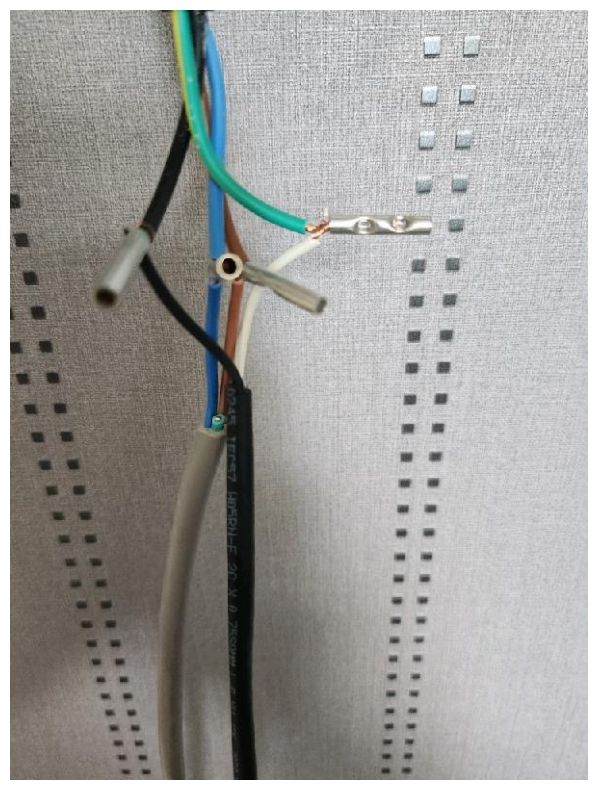

In [10]:
# Display a random image
img = images[np.random.randint(0, len(imgIds))]
im = cv2.imread(im_folder + img['file_name'])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im), plt.axis('off');

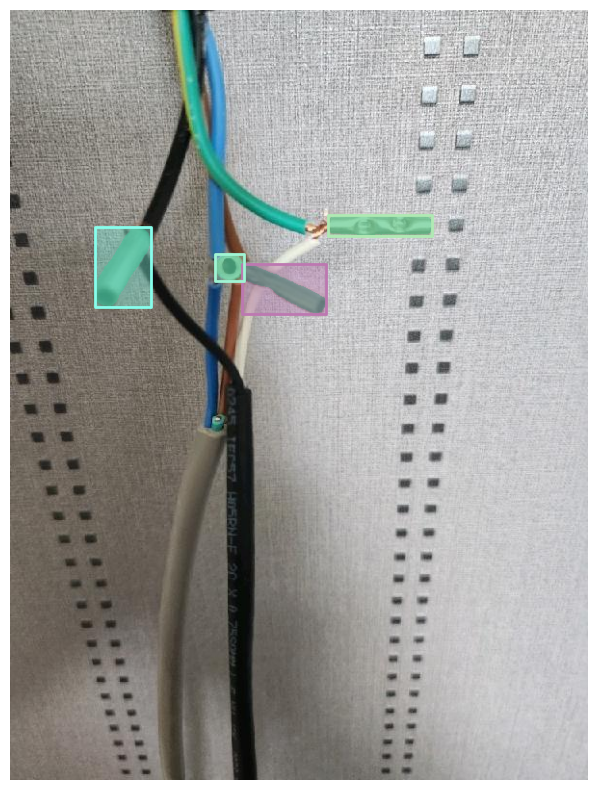

In [11]:
# Load and display instance annotations
plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [12]:
# Show bbox labels
[{nms[annot['category_id'] - 1]: annot['bbox']} for annot in anns]

[{'slv_front': [330.0, 213.0, 108.0, 21.0]},
 {'slv_side': [241.0, 263.0, 87.0, 52.0]},
 {'slv_wrong': [88.0, 225.0, 58.0, 83.0]},
 {'slv_wrong': [213.0, 253.0, 30.0, 28.0]}]

Below is an example annotation, which is a dictionary with:
- `id`: int,
- `category_id`: int,
- `image_id`: int,
- `iscrowd`: a single object (iscrowd=0) or a collection of objects (iscrowd=1),
- `area`: float,
- `bbox`: coordinates of unnormalized bounding box in (cx, cy, w, h) format,
- `segmentation`: coordinates of polygon segmentation mask

In [13]:
anns[0]

{'id': 6918,
 'image_id': 2943,
 'category_id': 1,
 'segmentation': {'counts': [264220,
   10,
   787,
   14,
   785,
   15,
   784,
   17,
   783,
   17,
   783,
   17,
   782,
   18,
   782,
   18,
   782,
   18,
   782,
   18,
   782,
   18,
   782,
   18,
   782,
   18,
   782,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   19,
   781,
   20,
   780,
   20,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   21,
   779,
   20,
   780,
   20,
   780,
   20,
   780,
   20,
   780,
   20,
   780,
   20,
   780,
   21,
   779,
   20,
   780,
   20,
   780,
   20,
   780,
   20,
   780,
   20,
   78

## 2. Gluon
In addition to the COCO API, the Gluon library also allows us to visualize the COCO dataset.

Tutorial: https://gluon-cv.mxnet.io/build/examples_datasets/mscoco.html

In [ ]:
# Install gluoncv
!pip install --upgrade mxnet-cu100 gluoncv

We will need to download the entire COCO dataset to use GluonCV.

In [ ]:
# Download the full COCO dataset
!wget https://gluon-cv.mxnet.io/_downloads/b6ade342998e03f5eaa0f129ad5eee80/mscoco.py
!python mscoco.py --download-dir ./coco

In [16]:
from gluoncv import data, utils

train_dataset = data.COCODetection(root='./coco', splits=['instances_train2017'])
val_dataset = data.COCODetection(root='./coco', splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=20.65s)
creating index...
index created!
loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


Image size (height, width, RGB): (640, 512, 3)
Num of objects: 14
Bounding boxes (x_min, y_min, x_max, y_max):
 [[ 40.27 133.75 390.19 477.92]
 [  1.64 200.84  44.46 345.7 ]
 [449.7  225.5  480.92 370.71]
 [439.73 240.79 460.4  350.76]
 [429.98 232.82 449.02 254.95]
 [475.05 230.71 511.   387.14]
 [423.37 230.97 431.24 246.7 ]
 [ 93.17 252.48 118.25 288.32]
 [388.62 243.74 409.49 354.21]
 [385.81 252.24 511.   331.42]
 [488.56 258.56 510.72 331.13]
 [386.79 230.99 401.54 301.03]
 [394.75 319.98 428.71 350.16]
 [397.78 224.14 441.66 377.81]]
Class IDs:
 [[ 6.]
 [ 6.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [24.]
 [26.]
 [ 0.]
 [26.]
 [ 0.]]


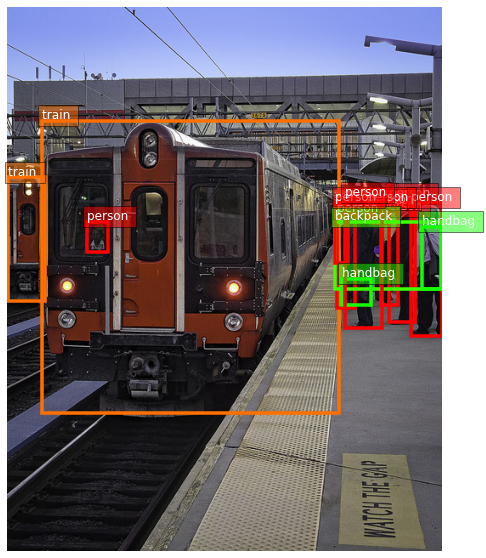

In [18]:
id_ = np.random.randint(0, 117266)
train_image, train_label = train_dataset[id_]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (x_min, y_min, x_max, y_max):\n', bounding_boxes)
print('Class IDs:\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.axis('off'), plt.show();